## Naive CV
#### implementing basic image processing functions using numpy

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as matimage
import matplotlib.axes as axes
import imageio

In [12]:
def load_image(file) :
    img = Image.open(file)
    img.load()
    data = np.asarray(img, dtype="int16")
    return data

In [13]:
def save_image(array, filename):
    matimage.imsave(filename, array, cmap=cm.gray)

In [26]:
cameraman = load_image("images/Cameraman_noise.bmp")
ocean = load_image("images/Ocean.bmp")

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.axis('off')
fig.add_subplot(1,2, 1).set_axis_off()
plt.imshow(cameraman, cmap=cm.gray)
fig.add_subplot(1,2, 2).set_axis_off()
plt.imshow(ocean, cmap=cm.gray)
plt.show()

AttributeError: module 'matplotlib.axes' has no attribute 'set_axis_off'

### Integral Image
takes as an input the image numpy array and returns a numpy array represeting the integral image of the input

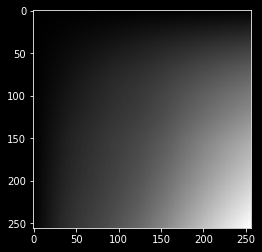

In [16]:
def integral_image(image):
    s = image.cumsum(axis = 0)
    ii = s.cumsum(axis = 1)
    
    return ii

integral_image = integral_image(cameraman)
save_image(integral_image, "output/Camera_Integ.jpg")
plt.imshow(integral_image, cmap=cm.gray)

### Co-occurance Matrix
computing the co-occurance matrix of a numpy array

In [17]:
def co_occurance(image):
    unique_values = np.unique(image)
    size = unique_values.shape[0]
    matrix = np.zeros(shape=(size, size))
    rows, columns = image.shape
        
    for i in range(1, rows):
        for j in range(columns):            
            checking = image[i][j]
            againist = image[i - 1][j]
 
            x, = np.where(unique_values == checking)
            y, = np.where(unique_values == againist)
            matrix[y, x] += 1
    
    return matrix, unique_values

#### Co-occurance matric exmaples

In [18]:
array1 = np.array([[4, 5, 6, 7, 8], [4, 5, 6, 7, 8], [4, 5, 6, 7, 8],[4, 5, 6, 7, 8]])
array2 = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]])
array3 = np.array([[4, 6, 8, 5, 4], [5, 5, 8, 7, 7], [6, 7, 7, 7, 9] , [8, 8, 4, 8, 6], [9, 8, 9, 5, 6]])
co_occurance(array3)

(array([[0., 1., 0., 1., 0., 1.],
        [0., 0., 1., 2., 0., 0.],
        [0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 2., 1.],
        [0., 1., 0., 1., 2., 1.],
        [0., 0., 1., 0., 0., 0.]]), array([4, 5, 6, 7, 8, 9]))

### Contrast
finding the contrast of an image using the co-occurance matrix

In [19]:
def contrast(image):
    co_matrix, unique_values = co_occurance(image)
    size = unique_values.shape[0]
    
    value = 0
    
    for i in range(size):
        for j in range(size):
            value += co_matrix[i][j] * (unique_values[i] - unique_values[j])**2
    return value

#### Contrast examples

In [20]:
contrast(ocean)

9631290.0

### Changing the contrast of the image based on the following graph having dynamic values
<img src="./images/contrast.png" />

In [21]:
def change_contrast_step(x):
    if(x <= A):
        return (B/A)*x
    if(x <= C):
        return ((D-B)/(C-A))*(x-A)+B
    else:
        return ((255-D)/(255-C))*(x-C)+D
    
change_contrast = np.vectorize(change_contrast_step)

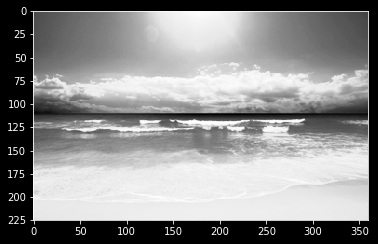

In [22]:
A = 20
B = 30
C = 180
D = 230

ocean_contrast_a = change_contrast(ocean)
save_image(ocean_contrast_a, "output/Ocean_a.jpg")
plt.imshow(ocean_contrast_a, cmap=cm.gray)

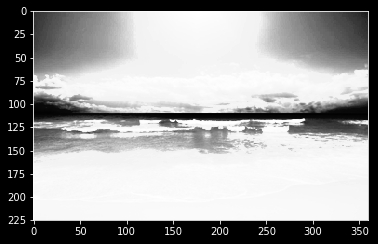

In [23]:
A = 70
B = 20
C = 140
D = 240

ocean_contrast_b = change_contrast(ocean)
save_image(ocean_contrast_b, "output/Ocean_b.jpg")
plt.imshow(ocean_contrast_b, cmap=cm.gray)

#### comparing the contrast values of image 1 and image 2

In [24]:
contrastA = contrast(ocean_contrast_a)
contrastB = contrast(ocean_contrast_b)
contrastOcean = contrast(ocean)

print(contrastOcean, contrastA, contrastB)

9631290.0 9886813.527777897 23383369.93094426


A and the original image have close contrast values, since we applied a light contrast effect and both images are not distinguishable. Howeever, the contrast effect in B is much richer and can be noticed by the naked eye. Hence, the great difference between the contrast values of the original image and that of B.

### Average filter for noise removal